In [1]:
pip install lime

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 151.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 104.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 144.9 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 209.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 184.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 168.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 165.3 kB/s eta 0:00:0000:0100:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=cf2abab5e24e0cae2e34f24685b075937832bea44d488b1acc76e16b28d4f9e9
  Stored in directory: /Users/owner/Library/Caches/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb

In [2]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 160.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 165.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 282.4 kB/s eta 0:00:0000:0100:04

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
df.columns = ['sep_length', 'sep_width', 'pet_length', 'pet_width', 'target']

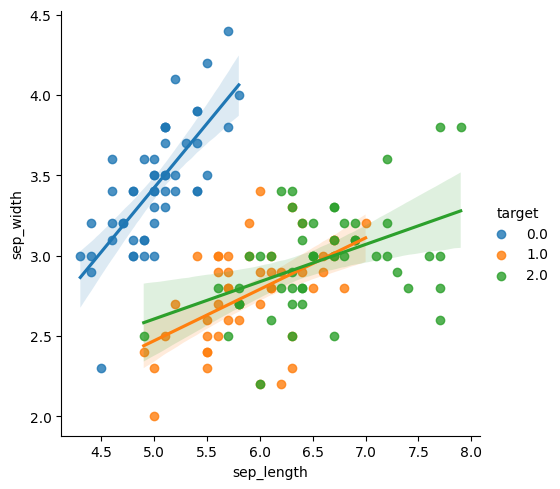

In [10]:
sns.lmplot(x='sep_length', y='sep_width', hue='target', data=df)

In [11]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score
rf_pred = rf_model.predict(X_test)
print(accuracy_score(rf_pred,y_test))
lr_pred = lr_model.predict(X_test)
print(accuracy_score(lr_pred,y_test))

0.9666666666666667
0.9666666666666667


In [13]:
rf_importance = rf_model.feature_importances_
print(rf_importance)
lr_importance = lr_model.coef_
print(lr_importance)

[0.09719156 0.017347   0.41641969 0.46904175]
[[-0.45783135  0.8498261  -2.33427886 -1.00930844]
 [ 0.64917409 -0.35899988 -0.20860056 -0.89937246]
 [-0.19134274 -0.49082622  2.54287942  1.90868091]]


In [14]:
import shap
import lime

/Users/owner/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
shap.initjs()

In [16]:
explainer = shap.Explainer(rf_model)

In [17]:
pip install numpy==2.0.0

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
shap_values = explainer.shap_values(X_test)

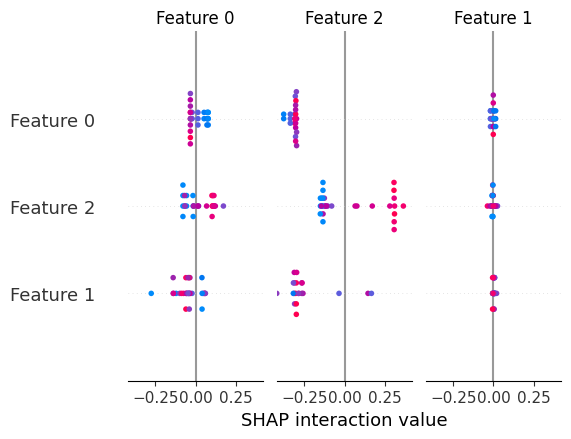

In [20]:
shap.summary_plot(shap_values, X_test, show=False, max_display=4)

In [21]:
explainer = shap.Explainer(rf_model)

In [23]:
shap.force_plot(explainer.expected_value[0], explainer.shap_values(X_test[0]))

In [24]:
X = df.iloc[:,:4]
y = df['target']